Blomap - энкодинги для аминокислотных последовательностей, основанные на матрице BLOSUM62, построенной на основе правильных выравниваний и учитывающей сходства и различия между физико-химическими свойствами аминокислот (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6399931/) 

Ноутбук делали в конце, при запуске могут быть проблемы, извините

In [62]:
# -*- coding: utf-8 -*-
import pickle
import re

import numpy as np
import warnings
import os

# from .results import Results

# from .parsing import get_registry_info, parse_uniprot


# def do_padding(seq, window_size=10):
#     if len(seq) >= window_size:
#         return seq
#     else:
#         while len(seq) < window_size:
#             current_length = len(seq)
#             if current_length % 2 == 0:
#                 seq = "X" + seq
#             else:
#                 seq = seq + "X"
#         return seq


def blomap_extra_encode(amino_sequence):
    blomap_physicochemical = {
        'A': [-0.57, 0.39, -0.96, -0.61, -0.69, 1, 71, 6.0, 0.806, 0.0, 10.0],
        'R': [-0.40, -0.83, -0.61, 1.26, -0.28, 4, 156, 10.8, 0.000, 52.0, 32.6],
        'N': [-0.70, -0.63, -1.47, 1.02, 1.06, 3, 114, 5.4, 0.448, 3.4, 20.4],
        'D': [-1.62, -0.52, -0.67, 1.02, 1.47, 3, 115, 3.0, 0.417, 49.7, 18.3],
        'C': [0.07, 2.04, 0.65, -1.13, -0.39, 2, 103, 5.0, 0.721, 1.5, 3.8],
        'Q': [-0.05, -1.50, -0.67, 0.49, 0.21, 4, 128, 5.7, 0.430, 3.5, 24.7],
        'E': [-0.64, -1.59, -0.39, 0.69, 1.04, 4, 129, 3.2, 0.458, 49.9, 15.8],
        'G': [-0.90, 0.87, -0.36, 1.08, 1.95, 0, 57, 6.0, 0.770, 0.0, 7.6],
        'H': [0.73, -0.67, -0.42, 1.13, 0.99, 3, 137, 7.6, 0.548, 51.6, 12.3],
        'I': [0.59, 0.79, 1.44, -1.90, -0.93, 3, 113, 6.0, 1.000, 0.2, 7.0],
        'L': [0.65, 0.84, 1.25, -0.99, -1.90, 3, 113, 6.0, 0.918, 0.1, 7.7],
        'K': [-0.64, -1.19, -0.65, 0.68, -0.13, 4, 128, 9.7, 0.263, 49.5, 34.3],
        'M': [0.76, 0.05, 0.06, -0.62, -1.59, 4, 131, 5.7, 0.811, 1.4, 7.2],
        'F': [1.87, 1.04, 1.28, -0.61, -0.16, 3, 147, 5.5, 0.951, 0.4, 8.1],
        'P': [-1.82, -0.63, 0.32, 0.03, 0.68, 1, 97, 6.3, 0.678, 1.6, 12.8],
        'S': [-0.39, -0.27, -1.51, -0.25, 0.31, 2, 87, 5.7, 0.601, 1.7, 12.9],
        'T': [-0.04, -0.30, -0.82, -1.02, -0.04, 2, 101, 5.6, 0.634, 1.6, 15.1],
        'W': [1.38, 1.69, 1.91, 1.07, -0.05, 3, 186, 5.9, 0.854, 2.1, 10.3],
        'Y': [1.75, 0.11, 0.65, 0.21, -0.41, 3, 163, 5.7, 0.714, 1.6, 18.3],
        'V': [-0.02, 0.30, 0.97, -1.55, -1.16, 2, 99, 6.0, 0.923, 0.1, 7.2],
        'X': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # unknown amino acids
        'Z': [-0.345, -1.545, -0.53, 0.59, 0.625, 4.0, 128.5, 4.45, 0.444, 26.7, 20.25],  # Glutamic acid or Glutamine,
        'U': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Selenocysteine
        'O': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pyrrolysine
        'B': [-1.16, -0.575, -1.07, 1.02, 1.265, 3.0, 114.5, 4.2, 0.4325, 26.55, 19.35],  # Aspartic acid or Asparagine
        'J': [0.62, 0.815, 1.345, -1.445, -1.415, 3.0, 113.0, 6.0, 0.959, 0.15, 7.35]  # Leucine or Isoleucine
    }

    translated_sequence = list()
    for amino_acid in amino_sequence:
        if amino_acid in ['J', 'B', 'O', 'U', 'Z']:
            warnings.warn("non-standard amino acid in seqeunce", Warning)
        translated_sequence.extend(blomap_physicochemical[amino_acid.upper()])
    return translated_sequence

In [150]:
import matplotlib.pyplot as plt

In [63]:
type(blomap_extra_encode('AKKK'))

list

In [64]:
def add_padding(string, length):
    while len(string) < length:
        string += 'X'
    return string

# Пример использования
my_string = "Hello"
desired_length = 10
padded_string = add_padding(my_string, desired_length)
print(padded_string)

HelloXXXXX


In [65]:
import pandas as pd
large_no_conc_df = pd.read_csv('large_no_conc_preprocessed.csv')
large_no_conc_df

,Unnamed: 0,Peptide,Cell line,Cargo,PubmedID,Uptake,Units,Time,Temp.,Method,Type,Sequence,new_uptake,nht_tail,acylated_terminal,cleaned_sequence
0,0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0,0,RKKRRQRRR
1,1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0,0,RKKRRQRR
2,2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0,0,RKKRRQR
3,3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0,0,KKRRQRRR
4,4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0,0,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,35456715,100,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR,100.00,0,0,RRHRHRHRHR
1520,2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,35456715,250,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR,250.00,0,0,RRRHRHRHRHR
1521,2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,35456715,400,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR,400.00,0,0,RRRRHRHRHRHR
1522,2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,35456715,500,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR,500.00,0,0,RRRRRHRHRHRHR


In [66]:
# Удаляем строки, где значение в столбце new_uptake больше 95-го процентиля
large_no_conc_df = large_no_conc_df[
    large_no_conc_df['new_uptake'] <= large_no_conc_df['new_uptake'].quantile(0.95)
    ]

In [67]:
# # Приводим текстовые данные к нижнему регистру
# text_columns = filtered_peptide_df.select_dtypes(include=['object']).columns
# filtered_peptide_df[text_columns] = filtered_peptide_df[text_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# # Переводим текстовые столбцы в категориальный тип
# text_columns = filtered_peptide_df.select_dtypes(include=['object']).columns
# filtered_peptide_df[text_columns] = filtered_peptide_df[text_columns].astype('category')

# # Получение числовых кодов для категориальных данных
# for col in text_columns:
#     filtered_peptide_df[col] = filtered_peptide_df[col].cat.codes

In [68]:
print(len(large_no_conc_df))
print(len(large_no_conc_df[large_no_conc_df['new_uptake'] != 0]))
large_no_conc_df = large_no_conc_df[large_no_conc_df['new_uptake'] != 0]

1448
1416


In [69]:
large_no_conc_df['length'] = large_no_conc_df['cleaned_sequence'].apply(len)
large_no_conc_df['adjusted_sequence'] = large_no_conc_df['cleaned_sequence'].apply(lambda s: add_padding(s, length=large_no_conc_df['length'].max()))
embeddings = list(large_no_conc_df['adjusted_sequence'])
embeddings = [blomap_extra_encode(i) for i in embeddings]
embeddings

[[-0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  -0.64,
  -1.19,
  -0.65,
  0.68,
  -0.13,
  4,
  128,
  9.7,
  0.263,
  49.5,
  34.3,
  -0.64,
  -1.19,
  -0.65,
  0.68,
  -0.13,
  4,
  128,
  9.7,
  0.263,
  49.5,
  34.3,
  -0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  -0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  -0.05,
  -1.5,
  -0.67,
  0.49,
  0.21,
  4,
  128,
  5.7,
  0.43,
  3.5,
  24.7,
  -0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  -0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  -0.4,
  -0.83,
  -0.61,
  1.26,
  -0.28,
  4,
  156,
  10.8,
  0.0,
  52.0,
  32.6,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [71]:
len(embeddings)

1416

In [76]:
np.array(embeddings).shape

(1416, 1100)

<Axes: >

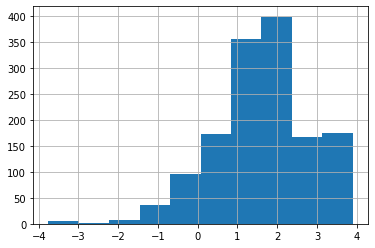

In [77]:
large_no_conc_df['log_uptake'] = large_no_conc_df['new_uptake'].apply(np.log10)
large_no_conc_df['log_uptake'].hist()

In [78]:
X = embeddings
y = np.array(large_no_conc_df['log_uptake'])

In [81]:
X = np.array(X)

In [124]:
all_features_df = pd.read_csv('/data/notebook_files/large_no_conc_basic_features.csv')

In [125]:
all_features_df

,Unnamed: 0,cleaned_sequence,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,...,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy,sequence,charge_at_ph,sequence_len
0,0,RKKRRQRRR,0.0,0.111,0.889,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.222222,0.0,0.0,0,0,-4.255556,RKKRRQRRR,7.758044,9
1,1,RKKRRQRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.250000,0.0,0.0,0,0,-4.225000,RKKRRQRR,6.758054,8
2,2,RKKRRQR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.285714,0.0,0.0,0,0,-4.185714,RKKRRQR,5.758064,7
3,3,KKRRQRRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.250000,0.0,0.0,0,0,-4.225000,KKRRQRRR,6.758054,8
4,4,KRRQRRR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,...,11.999968,0.142857,0.0,0.0,0,0,-4.271429,KRRQRRR,5.759053,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1519,RRHRHRHRHR,0.0,0.000,1.000,0.0,0.600,0.400,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-3.980000,RRHRHRHRHR,6.108738,10
1520,1520,RRRHRHRHRHR,0.0,0.000,1.000,0.0,0.636,0.364,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.027273,RRRHRHRHRHR,7.108728,11
1521,1521,RRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.667,0.333,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.066667,RRRRHRHRHRHR,8.108718,12
1522,1522,RRRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.692,0.308,1.0,0.0,...,11.999968,0.000000,0.0,0.0,0,0,-4.100000,RRRRRHRHRHRHR,9.108708,13


In [126]:
all_features_df = all_features_df.drop(columns=['Unnamed: 0', 'sequence'])

In [127]:
predictors_df = pd.read_csv('/data/notebook_files/large_no_conc_preprocessed.csv')
predictors_df

,Unnamed: 0,Peptide,Cell line,Cargo,PubmedID,Uptake,Units,Time,Temp.,Method,Type,Sequence,new_uptake,nht_tail,acylated_terminal,cleaned_sequence
0,0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0,0,RKKRRQRRR
1,1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0,0,RKKRRQRR
2,2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0,0,RKKRRQR
3,3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0,0,KKRRQRRR
4,4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0,0,KRRQRRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,2090,Oleyl-R2-(HR)4,MDA-MB-231 cells,siRNA-A490,35456715,100,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRHRHRHRHR,100.00,0,0,RRHRHRHRHR
1520,2091,Oleyl-R3-(HR)4,MDA-MB-231 cells,siRNA-A491,35456715,250,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRHRHRHRHR,250.00,0,0,RRRHRHRHRHR
1521,2092,Oleyl-R4-(HR)4,MDA-MB-231 cells,siRNA-A492,35456715,400,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRHRHRHRHR,400.00,0,0,RRRRHRHRHRHR
1522,2093,Oleyl-R5-(HR)4,MDA-MB-231 cells,siRNA-A493,35456715,500,Mean Fluorescence intensity,1440.0,37.0,Flow cytometry,Cellular internalization of oleyl,RRRRRHRHRHRHR,500.00,0,0,RRRRRHRHRHRHR


In [128]:
predictors_df = predictors_df[['Cell line', 'Time', 'Temp.', 'nht_tail', 'acylated_terminal', 'new_uptake']]

In [129]:
all_features_df = pd.concat(
    [all_features_df,
     predictors_df.set_index(all_features_df.index)],
    axis=1, ignore_index=False
)
all_features_df

,cleaned_sequence,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,_SecondaryStrC2,_SecondaryStrC3,...,molar_extinction_coefficient_oxidized,gravy,charge_at_ph,sequence_len,Cell line,Time,Temp.,nht_tail,acylated_terminal,new_uptake
0,RKKRRQRRR,0.0,0.111,0.889,0.0,1.000,0.000,1.0,0.0,0.0,...,0,-4.255556,7.758044,9,Jurkat cells,15.0,23.0,0,0,650.00
1,RKKRRQRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,0.0,...,0,-4.225000,6.758054,8,Jurkat cells,10.0,23.0,0,0,31.25
2,RKKRRQR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,0.0,...,0,-4.185714,5.758064,7,Jurkat cells,10.0,23.0,0,0,10.00
3,KKRRQRRR,0.0,0.125,0.875,0.0,1.000,0.000,1.0,0.0,0.0,...,0,-4.225000,6.758054,8,Jurkat cells,10.0,23.0,0,0,22.50
4,KRRQRRR,0.0,0.143,0.857,0.0,1.000,0.000,1.0,0.0,0.0,...,0,-4.271429,5.759053,7,Jurkat cells,10.0,23.0,0,0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,RRHRHRHRHR,0.0,0.000,1.000,0.0,0.600,0.400,1.0,0.0,0.0,...,0,-3.980000,6.108738,10,MDA-MB-231 cells,1440.0,37.0,0,0,100.00
1520,RRRHRHRHRHR,0.0,0.000,1.000,0.0,0.636,0.364,1.0,0.0,0.0,...,0,-4.027273,7.108728,11,MDA-MB-231 cells,1440.0,37.0,0,0,250.00
1521,RRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.667,0.333,1.0,0.0,0.0,...,0,-4.066667,8.108718,12,MDA-MB-231 cells,1440.0,37.0,0,0,400.00
1522,RRRRRHRHRHRHR,0.0,0.000,1.000,0.0,0.692,0.308,1.0,0.0,0.0,...,0,-4.100000,9.108708,13,MDA-MB-231 cells,1440.0,37.0,0,0,500.00


In [130]:
# Приводим текстовые данные к нижнему регистру
text_columns = all_features_df.select_dtypes(include=['object']).columns
all_features_df[text_columns] = all_features_df[text_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Переводим текстовые столбцы в категориальный тип
text_columns = all_features_df.select_dtypes(include=['object']).columns
all_features_df[text_columns] = all_features_df[text_columns].astype('category')

# Получение числовых кодов для категориальных данных
for col in text_columns:
    all_features_df[col] = all_features_df[col].cat.codes

In [131]:
all_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   cleaned_sequence                       1524 non-null   int16  
 1   _PolarizabilityC1                      1524 non-null   float64
 2   _PolarizabilityC2                      1524 non-null   float64
 3   _PolarizabilityC3                      1524 non-null   float64
 4   _SolventAccessibilityC1                1524 non-null   float64
 5   _SolventAccessibilityC2                1524 non-null   float64
 6   _SolventAccessibilityC3                1524 non-null   float64
 7   _SecondaryStrC1                        1524 non-null   float64
 8   _SecondaryStrC2                        1524 non-null   float64
 9   _SecondaryStrC3                        1524 non-null   float64
 10  _ChargeC1                              1524 non-null   float64
 11  _Cha

In [132]:
all_features_df.to_numpy().shape

(1524, 61)

In [133]:
X.shape

(1416, 1100)

In [134]:
# We need to remove 95 and remove zeros becasue of log(uptake)

all_features_df = all_features_df[
    all_features_df['new_uptake'] <= all_features_df['new_uptake'].quantile(0.95)
    ]
print(len(all_features_df))
print(len(all_features_df[all_features_df['new_uptake'] != 0]))
all_features_df = all_features_df[all_features_df['new_uptake'] != 0]

1448
1416


In [137]:
len(all_features_df)

1416

In [152]:
len(all_features_df.columns)

61

In [135]:
X.shape

(1416, 1100)

In [136]:
y.shape

(1416,)

In [141]:
all_features_df.head(10).to_numpy()

array([[ 4.34000000e+02, 0.00000000e+00, 1.11000000e-01,
 8.89000000e-01, 0.00000000e+00, 1.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 8.89000000e-01, 1.11000000e-01,
 0.00000000e+00, 0.00000000e+00, 1.11000000e-01,
 8.89000000e-01, 0.00000000e+00, 1.11000000e-01,
 8.89000000e-01, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 2.50000000e-01, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
 2.50000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.33960330e+03, 0.00000000e+00,
 2.57444444e+02, 1.19999678e+01, 2.22222222e-01,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, -4.25555556e+00, 7.75804361e+00,
 9.00000000e+00, 6.40000000e+01, 1.50000000e+01,
 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
 6.50000000e+02],
 [ 4.32000000e+02, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 0.00000000e+00, 1.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 8.75000000e-01, 1.25000000e-01,
 0.00000000e+00, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 2.86000000e-01, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.18341760e+03, 0.00000000e+00,
 2.16775000e+02, 1.19999678e+01, 2.50000000e-01,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, -4.22500000e+00, 6.75805361e+00,
 8.00000000e+00, 6.40000000e+01, 1.00000000e+01,
 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
 3.12500000e+01],
 [ 4.30000000e+02, 0.00000000e+00, 1.43000000e-01,
 8.57000000e-01, 0.00000000e+00, 1.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 8.57000000e-01, 1.43000000e-01,
 0.00000000e+00, 0.00000000e+00, 1.43000000e-01,
 8.57000000e-01, 0.00000000e+00, 1.43000000e-01,
 8.57000000e-01, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 3.33000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 3.33000000e-01, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 3.33000000e-01, 0.00000000e+00, 0.00000000e+00,
 3.33000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.02723190e+03, 0.00000000e+00,
 1.64485714e+02, 1.19999678e+01, 2.85714286e-01,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, -4.18571429e+00, 5.75806361e+00,
 7.00000000e+00, 6.40000000e+01, 1.00000000e+01,
 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
 1.00000000e+01],
 [ 2.42000000e+02, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 0.00000000e+00, 1.00000000e+00,
 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 8.75000000e-01, 1.25000000e-01,
 0.00000000e+00, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 0.00000000e+00, 1.25000000e-01,
 8.75000000e-01, 1.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 2.86000000e-01, 0.00000000e+00,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 2.86000000e-01, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, 1.18341760e+03, 0.00000000e+00,
 2.88375000e+02, 1.19999678e+01, 2.50000000e-01,
 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
 0.00000000e+00, -4.22500000e+00, 6.75805361e+00,
 8.00000000e+00, 6.40000000e+01, 1.00000000e+01,
 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
 2.25000

In [142]:
X[:10]

array([[-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 ...,
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ]])

In [144]:
np.hstack([all_features_df.head(10).to_numpy(), X[:10]])

array([[4.34e+02, 0.00e+00, 1.11e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
 [4.32e+02, 0.00e+00, 1.25e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
 [4.30e+02, 0.00e+00, 1.43e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
 ...,
 [4.08e+02, 1.11e-01, 1.11e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
 [4.25e+02, 1.11e-01, 1.11e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
 [4.26e+02, 1.11e-01, 1.11e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [145]:
X = np.hstack([all_features_df.to_numpy(), X])

In [146]:
X.shape

(1416, 1161)

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training features and target labels, and X_test is your test set

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the random forest regressor
rf_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.003033435123879007


In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are your true target labels and predicted target labels

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) score: ", r2)

Mean Squared Error (MSE):  0.003033435123879007
Mean Absolute Error (MAE):  0.010894527341365074
Root Mean Squared Error (RMSE):  0.05507662956172071
R-squared (R^2) score:  0.997930806083347


In [151]:
print('TRAIN')

y_pred = rf_regressor.predict(X_train)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE): ", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

# R-squared (R^2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) score: ", r2)

TRAIN
Mean Squared Error (MSE):  0.00034051151374267616
Mean Absolute Error (MAE):  0.003249922880891655
Root Mean Squared Error (RMSE):  0.018452954065478953
R-squared (R^2) score:  0.9997569748333031


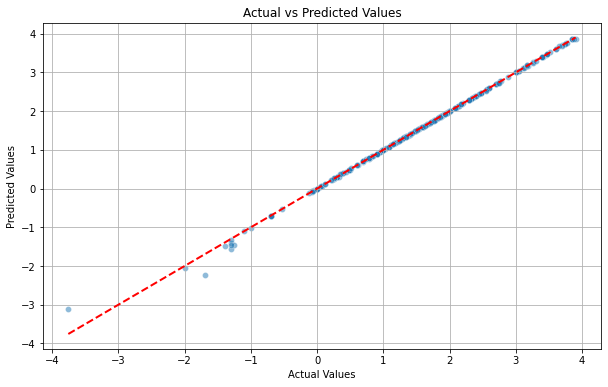

In [149]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [31]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense

# # Generate some sample data
# # Replace this with your actual dataset
# #data = np.random.randn(100, 10)  # Example data of shape (samples, timesteps)

# # Split the data into input X and target y
# # X = data[:, :-1]  # Use all but the last column as input
# # y = data[:, -1]   # Use the last column as target

# # Reshape the input data for LSTM
# X = X.reshape(X.shape[0], X.shape[1], 1)  # Input shape (samples, timesteps, features)

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
# model.add(Dense(1))  # Output layer with 1 neuron for regression

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X, y, epochs=100, batch_size=32)

In [32]:
# data = np.random.randn(100, 10)
# data

In [52]:
np.array(embeddings)

array([[-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 ...,
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [-0.4 , -0.83, -0.61, ..., 0. , 0. , 0. ],
 [ 0.07, 2.04, 0.65, ..., 0. , 0. , 0. ]])

In [53]:
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, make_scorer

In [54]:
# Создание и обучение модели XGBoost
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4
    )
xg_reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = xg_reg.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'XGBoost Regression Model:')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  Mean Absolute Error (MAE): {mae:.4f}')
print(f'  Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'  R-squared (R^2): {r2:.4f}')

XGBoost Regression Model:
  Mean Squared Error (MSE): 0.6142
  Mean Absolute Error (MAE): 0.5391
  Root Mean Squared Error (RMSE): 0.7837
  R-squared (R^2): 0.5811


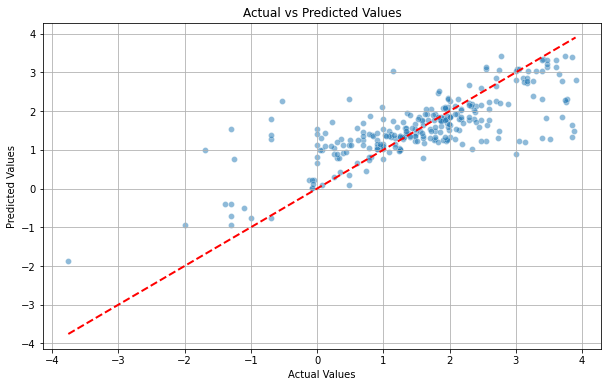

In [56]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [57]:
# Инициализация модели XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Параметры для поиска
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Использование RandomizedSearchCV для поиска лучших гиперпараметров
random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=50, 
    scoring='neg_mean_absolute_error', 
    cv=3, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1
    )

# Обучение модели
random_search.fit(X_train, y_train)

# Лучшие параметры
best_params = random_search.best_params_
print(f"Лучшие параметры: {best_params}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Лучшие параметры: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [ ]:
BEST_XGBOOST_PARAMS = {
    'subsample': 0.7,
    'reg_lambda': 1.5,
    'reg_alpha': 0.01,
    'n_estimators': 300,
    'max_depth': 7,
    'learning_rate': 0.05,
    'colsample_bytree': 0.7
}

In [17]:
# Обучение модели с лучшими параметрами
best_model = random_search.best_estimator_

# Предсказания и оценка модели
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'XGBoost Regression Model:')
print(f'  Mean Squared Error (MSE): {mse:.4f}')
print(f'  Mean Absolute Error (MAE): {mae:.4f}')
print(f'  Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'  R-squared (R^2): {r2:.4f}')

XGBoost Regression Model:
  Mean Squared Error (MSE): 0.5455
  Mean Absolute Error (MAE): 0.4959
  Root Mean Squared Error (RMSE): 0.7386
  R-squared (R^2): 0.6279


## Выводы
- Из-за того, что последовательности в train и test оказались слишком похожи произошел лик данных (для энкодингов, основанных на выравниваниях схожесть последовательностей оказалась критична, даже если совсем идентичных среди них нет)
- For future: можно очистить датасет от схожих последовательностей по некоторому трешхолду и попробовать подход с такими энкодингами снова 